# Тестовое задание на позицию Data Engineer

In [1]:
from joblib import Parallel, delayed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from collections import Counter

## Исходный датасет

Необходимо сгенерировать свой датасет или выбрать любой публичный датасет имеющий:
* не менее 100 млн записей
* имеющий колонки различных типов данных - numeric, datetime (range в несколько лет), string
* достаточно минимального набора колонок, чтобы датафайл был не сильно большой
* имеющий не менее 10% дублей (допускается добавить их самостоятельно)
* хранящийся в csv/json формате в файле на диске или по url

In [2]:
# Скрипт для генерации датасета
!python3.11 generate_dataset.py

Начало Chunk 1
Начало Chunk 2
Начало Chunk 3
Начало Chunk 4
Начало Chunk 5
Начало Chunk 6
Начало Chunk 7
Начало Chunk 8
Chunk 4 завершён. Время: 22.99 секунд.
Chunk 5 завершён. Время: 23.18 секунд.
Chunk 8 завершён. Время: 24.10 секунд.
Chunk 2 завершён. Время: 24.32 секунд.
Chunk 6 завершён. Время: 24.40 секунд.
Chunk 7 завершён. Время: 24.45 секунд.
Chunk 1 завершён. Время: 25.14 секунд.
Chunk 3 завершён. Время: 25.22 секунд.
Начало Chunk 9
Начало Chunk 10
Начало Chunk 11
Начало Chunk 12
Начало Chunk 13
Начало Chunk 14
Chunk 9 завершён. Время: 17.04 секунд.
Chunk 10 завершён. Время: 17.57 секунд.
Начало Chunk 15
Chunk 11 завершён. Время: 17.94 секунд.
Начало Chunk 16
Chunk 12 завершён. Время: 18.80 секунд.
Chunk 13 завершён. Время: 18.68 секунд.
Chunk 14 завершён. Время: 18.60 секунд.
Chunk 15 завершён. Время: 17.81 секунд.
Chunk 16 завершён. Время: 17.04 секунд.
Объединение завершено. Время: 73.14 секунд.
Генерация завершена. Время: 274.65 секунд.


In [3]:
generated_df = pd.read_csv('generated_dataset.csv')

In [4]:
generated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000000 entries, 0 to 109999999
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   numeric   float64
 2   string    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ GB


In [5]:
generated_df.duplicated().sum()

10000000

In [6]:
generated_df.isna().sum()

datetime         0
numeric     550176
string      550250
dtype: int64

## Считывание и процессинг

Считываем файл или тянем данные по ссылке и процессим данные:
* удалить пустые / na строки
* удалить дубли
* строки в которых нет цифр превратить в пустые
* удалить записи в промежутке от 1 до 3 часов ночи

Для ускорения выполнения распараллеливайте выполнение этих шагов

In [7]:
# Скрипт для процессинга датасета
!python3.11 process_dataset.py

Chunk обработан. Время: 9.60 секунд.
Chunk обработан. Время: 10.02 секунд.
Chunk обработан. Время: 9.63 секунд.
Chunk обработан. Время: 9.61 секунд.
Chunk обработан. Время: 9.58 секунд.
Chunk обработан. Время: 9.93 секунд.
Chunk обработан. Время: 9.56 секунд.
Chunk обработан. Время: 9.42 секунд.
Chunk обработан. Время: 9.25 секунд.
Chunk обработан. Время: 9.12 секунд.
Chunk обработан. Время: 8.94 секунд.
Chunk обработан. Время: 8.86 секунд.
Chunk обработан. Время: 8.86 секунд.
Chunk обработан. Время: 9.62 секунд.
Chunk обработан. Время: 11.42 секунд.
Chunk обработан. Время: 9.11 секунд.
Chunk обработан. Время: 8.98 секунд.
Chunk обработан. Время: 5.25 секунд.
Объединение завершено. Время: 148.79 секунд.
Удаление дублей завершено. Время: 205.27 секунд.
Сохранение завершено. Время: 334.30 секунд.


In [8]:
processed_df = pd.read_csv('processed_dataset.csv')

In [9]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73473375 entries, 0 to 73473374
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   numeric   float64
 2   string    object 
dtypes: float64(1), object(2)
memory usage: 1.6+ GB


In [10]:
processed_df.duplicated().sum()

0

In [11]:
processed_df.isna().sum()

datetime    0
numeric     0
string      0
dtype: int64

## Расчет метрик

Агрегация по времени, для каждого часа рассчитать
* кол-во уникальных string
* среднее и медиану для numeric

Так же напиcать SQL запрос для выполнения подобных расчетов напрямую в базе данных

In [12]:
# Функции для выполнения каждой отдельной операции
def calculate_unique_strings(df):
    return df.resample('H')['string'].nunique()

def calculate_mean_numeric(df):
    return df.resample('H')['numeric'].mean()

def calculate_median_numeric(df):
    return df.resample('H')['numeric'].median()

In [13]:
processed_df['datetime'] = pd.to_datetime(processed_df['datetime'])
processed_df.set_index('datetime', inplace=True)

In [14]:
# Параллельное выполнение с помощью joblib
results = Parallel(n_jobs=3)(
    delayed(func)(processed_df) for func in [calculate_unique_strings, calculate_mean_numeric, calculate_median_numeric]
)
unique_strings, mean_numeric, median_numeric = results

In [15]:
unique_strings.name = 'unique_strings'
mean_numeric.name = 'mean_numeric'
median_numeric.name = 'median_numeric'

In [16]:
# SELECT
#     HOUR(datetime) AS hour,
#     COUNT(DISTINCT string) AS unique_strings,
#     AVG(numeric) AS mean_numeric,
#     MEDIAN(numeric) AS median_numeric
# FROM dataset
# GROUP BY hour;

## Мерж с метриками

К каждой строке в исходном датасете примержить метрики ближайшего часа рассчитанные в предыдущем шаге

In [17]:
processed_df = processed_df.reset_index()
processed_df['datetime'] = pd.to_datetime(processed_df['datetime'])

# Выполняем мерж по ближайшему времени (по умолчанию ищет ближайшую предыдущую дату)
merged_df = processed_df.sort_values('datetime')
for df in [unique_strings, mean_numeric, median_numeric]:
    df = df.reset_index()
    df['datetime'] = pd.to_datetime(df['datetime'])
    merged_df = pd.merge_asof(
        merged_df, df.sort_values('datetime'), on='datetime', direction='backward'
    )

In [18]:
merged_df

,datetime,numeric,string,unique_strings,mean_numeric,median_numeric
0,1834-08-14 03:00:59.809442,4.0,0BOwA0onq,52,25.865385,19.5
1,1834-08-14 03:01:59.809442,26.0,FS F81KT1Jsp,52,25.865385,19.5
2,1834-08-14 03:02:59.809442,13.0,cI7Ud3hVZS,52,25.865385,19.5
3,1834-08-14 03:03:59.809442,15.0,kjN5MXb3R.p,52,25.865385,19.5
4,1834-08-14 03:04:59.809442,97.0,G2m9?P,52,25.865385,19.5
...,...,...,...,...,...,...
73473370,2024-09-30 12:43:59.809442,2.0,HTtky6,43,20.790698,11.0
73473371,2024-09-30 12:45:59.809442,11.0,"LfXApZB,2Mbp1Wt",43,20.790698,11.0
73473372,2024-09-30 12:48:59.809442,6.0,yP9Sb2,43,20.790698,11.0
73473373,2024-09-30 12:49:59.809442,14.0,K0X3KTAw U3,43,20.790698,11.0


In [19]:
# Сохраняем результат
merged_df.to_csv('merged_dataset.csv', index=False)

## Аналитические метрики

Для колонки numeric по полному датасету построить

### Гистограмма

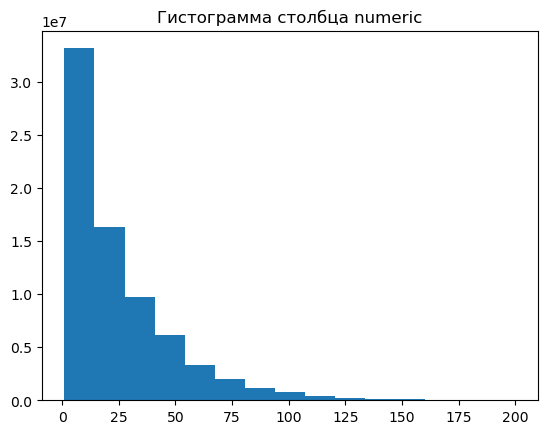

In [20]:
plt.hist(merged_df['numeric'], bins=15)
plt.title('Гистограмма столбца numeric')
plt.show()

### 95% доверительный интервал

Выбор метрики - так как данных достаточно много, то выбрана среднее + λ для экспоненциального распределения

In [41]:
sample_mean = np.mean(processed_df['numeric'])
n = len(processed_df['numeric'])

# Оценка параметра λ через среднее
lambda_ = 1 / sample_mean

std_error = sample_mean / np.sqrt(n)
z_score = stats.norm.ppf((1 + 0.95) / 2)

# Границы доверительного интервала для λ
ci_lower_lambda = lambda_ - z_score * std_error
ci_upper_lambda = lambda_ + z_score * std_error

# Границы доверительного интервала для среднего
ci_lower_mean = sample_mean - z_score * std_error
ci_upper_mean = sample_mean + z_score * std_error

# Вывод результатов
print(f"Оценка параметра λ: {lambda_hat}")
print(f"95% доверительный интервал для λ: [{ci_lower_lambda}, {ci_upper_lambda}]")
print(f"Среднее: {sample_mean}")
print(f"95% доверительный интервал для среднего: [{ci_lower_mean}, {ci_upper_mean}]")

Оценка параметра λ: 0.04075894106726838
95% доверительный интервал для λ: [0.035148975394045455, 0.0463689067404913]
Среднее: 24.534494121169743
95% доверительный интервал для среднего: [24.52888415549652, 24.540104086842966]


## Визуализация

### График среднего значения numeric колонки (y) по месяцам (x)

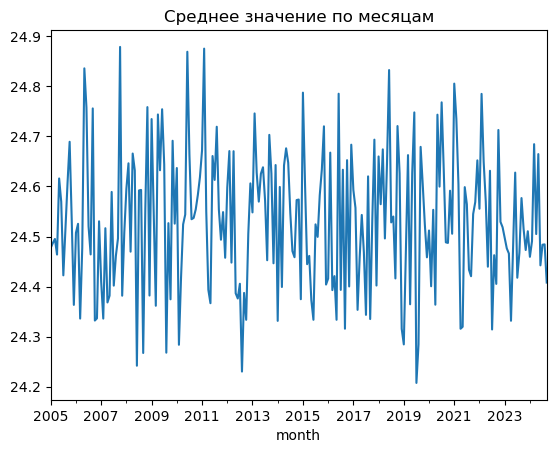

In [42]:
merged_df['month'] = merged_df['datetime'].dt.to_period('M')
monthly_avg = merged_df.groupby('month')['numeric'].mean()

# Для нормального 
monthly_avg = monthly_avg[monthly_avg.index.year > 2004].copy()

monthly_avg.plot()
plt.title('Среднее значение по месяцам')
plt.show()

### Heatmap по частотности символов в колонке string

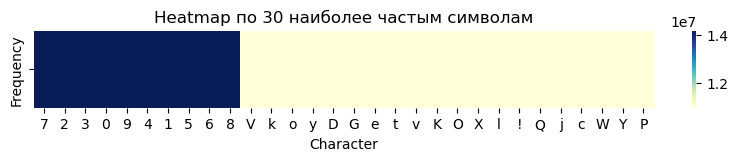

In [43]:
# Шаг 1: Собираем все символы из столбца 'string'
all_characters = ''.join(merged_df['string'].dropna())  # Объединяем все строки в одну

top_chars = Counter(all_characters).most_common(30)
char_df = pd.DataFrame(top_chars, columns=['Character', 'Frequency']).set_index('Character')

# Строим тепловую карту только для наиболее частых символов
plt.figure(figsize=(10, 1))
sns.heatmap(char_df.T, cmap="YlGnBu")
plt.title("Heatmap по 30 наиболее частых символов")
plt.show()